**Autor: Gustavo Henrique Reis de Araújo Lima**

**Instituição: CEFET - MG - Unidade Contagem**

**(feito em Julia 1.4)**

**Última atualização: 26/05/2020**

**Requisitos: Plots.jl, LaTeXStrings.jl**

***
# **1. Cinemática**

## **1.4 Vetores**

### **1.4.4 Multiplicação de um vetor por um escalar**

Multiplicar um vetor $\vec{A}$ por um fator Inteiro $N$ é o mesmo que somá-lo $N$ vezes consecutivas. Assim sendo, o resultado dessa multiplicação, $\vec{S} = N \cdot \vec{A}$, é:

$$\vec{S} = N \cdot \vec{A} = (N\cdot A_x, N \cdot A_y).$$

Não é necessário que $N$ seja apenas um número Inteiro, $N$ pode ser qualquer número Real.

In [1]:
using Plots
using LaTeXStrings
using Printf

#função para encontrar as coordenadas do texto de identificação do vetor A.
#A identificação será colocada na posição média do vetor a uma altura igual a TextHeight.
#Para funcionar os eixos x e y tem que ter o mesmo tamanho!
function rotate_text(TextHeight::Float64, Vec::Vector{T}) where {T<:Real}
    modVec = hypot(Vec[1], Vec[2])
    Vec[1] >= 0 && (angVec = asind(Vec[2]/modVec))
    Vec[1] < 0 && (angVec = 180 - asind(Vec[2]/modVec))
    rotM = [cosd(angVec) sind(angVec)
           -sind(angVec) cosd(angVec)]
    TextPos = [modVec/2 TextHeight]
    return TextPos*rotM
end

rotate_text (generic function with 1 method)

In [2]:
#definindo o vetor A
A = [5,7]

#definindo um valor aleatório e inteiro para N
N = rand(2:1:10)

4

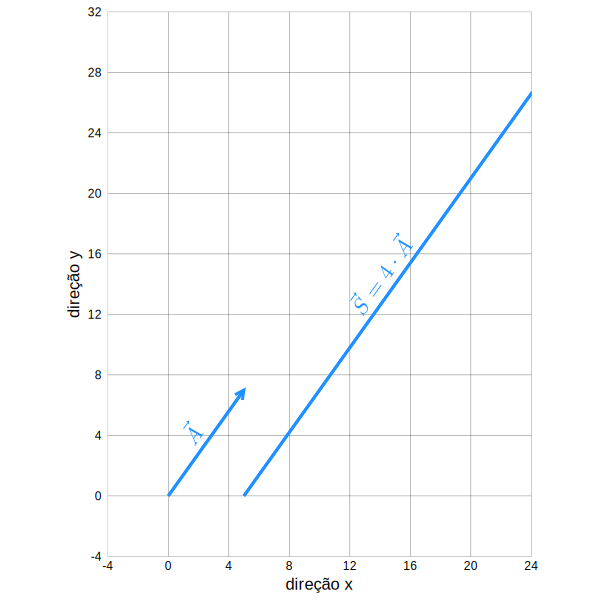

In [3]:
#calculando S = N*A
S = N*A

default(grid = true, markersize = 8, framestyle = :grid, linewidth = 3, legend = :false, size = (600,600),
    aspect_ratio = :equal, gridalpha = 1)

#títulos dos eixos
xtitle = "direção x"
ytitle = "direção y"

#criando string de identificação do vetor A
idAstr = latexstring("\\vec{A}")
idSstr = @sprintf("\\vec{S} = %i \\cdot \\vec{A}", N)
idSstr = latexstring(idSstr)

#calculando ângulo entre A e a direção x em graus
ang = atand(A[2]/A[1])

#calculando posição do texto de identificação do vetor A
idApos = rotate_text(N*0.3, A)
idSpos = rotate_text(N*0.3, S)

xmax = max(0, S[1])
xmin = min(0, S[1])
ymax = max(0, S[2])
ymin = min(0, S[2])

xlimits = (xmin - N, xmax + N)
ylimits = (ymin - N, ymax + N)

#criando anotação com a identificação de A
ann_id = [(idApos[1], idApos[2], text(idAstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = ang)),
    (idSpos[1] + 5, idSpos[2], text(idSstr, halign = :center, valign = :center, pointsize = 15, color = :dodgerblue, 
    rotation = ang))]

#desenhando imagem
quiver([0],[0], quiver = ([A[1]],[A[2]]), color = :dodgerblue, xaxis = (xtitle, xlimits, xlimits[1]:N:xlimits[2]),
    yaxis = (ytitle, ylimits, ylimits[1]:N:ylimits[2]), gridalpha = 0.5)
quiver!([5],[0], quiver = ([S[1]],[S[2]]), color = :dodgerblue)


#descomente a linha abaixo para mostrar as componentes do vetor A
#quiver!([0,A[1]],[0,0], quiver = ([A[1],0],[0,A[2]]), color = :red, ls = :dot, alpha = 0.5)

annotate!(ann_id)

In [4]:
#vetor S
Sstr = @sprintf("\\vec{S} = (%i, %i)", S[1], S[2])
latexstring(Sstr)

L"$\vec{S} = (20, 28)$"

Sendo $\vec{S} = N \cdot \vec{A}$, o módulo de $\vec{S}$ é:

$$||\vec{S}|| = N \cdot ||\vec{A}||.$$

In [5]:
#módulo de A e S
modA = hypot(A[1],A[2])
modS = hypot(S[1],S[2])

modAstr = @sprintf("||\\vec{A}|| = %4.3f", modA)
modAstr = replace(modAstr, "." => ",\\!")
modSstr = @sprintf("||\\vec{S}|| = %i \\cdot ||\\vec{A}|| = %5.3f", N, modS)
modSstr = replace(modSstr, "." => ",\\!")

modtext = latexstring(modAstr, "\\newline", modSstr)

L"$||\vec{A}|| = 8,\!602\newline||\vec{S}|| = 4 \cdot ||\vec{A}|| = 34,\!409$"

### **1.4.5 Decomposição vetorial**

Pode ser que em alguns casos, você não receba as componentes do vetor com o qual se vai trabalhar, ao invés disso, você recebe o valor do módulo do vetor e o ângulo que o vetor faz com alguma direção pré-estabelecida. Vimos que para realizar operações matemáticas com vetores é necessário conhecer as componentes dos vetores com os quais estamos trabalhando, então o que fazer quando temos apenas o módulo e o ângulo? Podemos resolver o problema graficamente como também foi visto, mas esta não é a maneira mais precisa caso tenhamos que desenhar os vetores numa folha de papel para descobrir o resultado. É possível descobrir as componentes de qualquer vetor em duas dimensões, se conhecemos seu módulo e o ângulo que ele faz com qualquer direção. Para isso devemos utilizar as relações trigonométricas que vimos anteriormente.

Um vetor qualquer $\vec{B}$ tem seu módulo e o ângulo com a direção horizontal dados abaixo: 

In [6]:
B = rand(1:1:10, 2)
ang_B = atand(B[2]/B[1])
mod_B = hypot(B[1], B[2])
mod_B_str = @sprintf("%3.2f", mod_B)
mod_B_txt = latexstring("||\\vec{B}|| = ", mod_B_str, "\\newline")
mod_B_txt = replace(mod_B_txt, "." => ",\\!")

ang_B_str = @sprintf("%3.2f", ang_B)
ang_B_txt = latexstring("{\\theta = }", ang_B_str)
ang_B_txt = replace(ang_B_txt, "." => ",\\!")

vecB_txt = latexstring(mod_B_txt, ang_B_txt)

L"$||\vec{B}|| = 6,\!32\newline$${\theta = }71,\!57$"

A representação gráfica de $\vec{B}$ pode ser vista na figura abaixo:

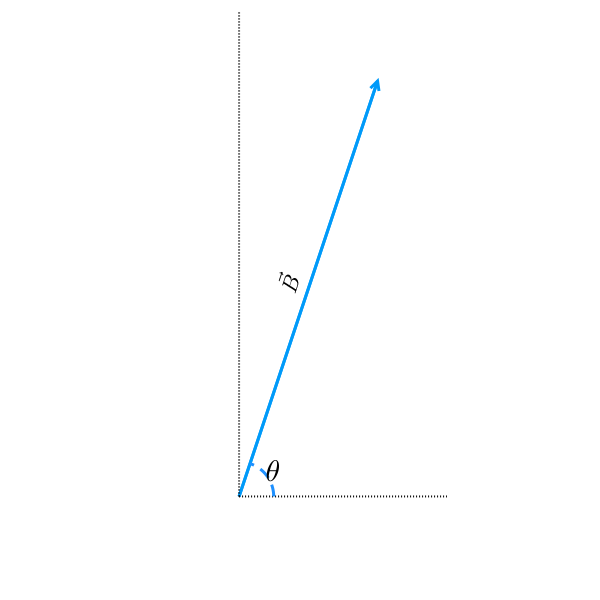

In [7]:
alt_txt = 0.05*mod_B
B_str = latexstring("\\vec{B}")
B_str_pos = rotate_text(alt_txt, B)
θ_str = latexstring("\\theta")
θ_pos = [0.30*B[1]*cosd(ang_B/2), 0.32*B[1]*sind(ang_B/2)]

θ_vet = range(0, ang_B, length = 50)
x_ang = 0.25*B[1]*cosd.(θ_vet)
y_ang = 0.25*B[1]*sind.(θ_vet)

ann_vec = [(B_str_pos[1], B_str_pos[2], text(B_str, halign = :center, valign = :center, rotation = ang_B, pointsize = 15)),
    (θ_pos[1], θ_pos[2], text(θ_str, halign = :center, valign = :center, pointsize = 20))]

quiver([0],[0], quiver = ([B[1]],[B[2]]), size = (600,600), framestyle = :none, xlimit = (-1,B[1]+1), 
    ylimit = (-1,B[2] + 1))
plot!([0,10],[0,0], ls = :dot, color = :black, lw = 2)
plot!([0,0],[0,10], ls = :dot, color = :black, lw = 2)
plot!(x_ang, y_ang, color = :dodgerblue, ls = :dash, ann = ann_vec)

Para descobrir as componetes de $\vec{B}$, vamos desenhar um triângulo retângulo tendo $\vec{B}$ como sua hipotenusa, e seus catetos nas direções horizontal e vertical.

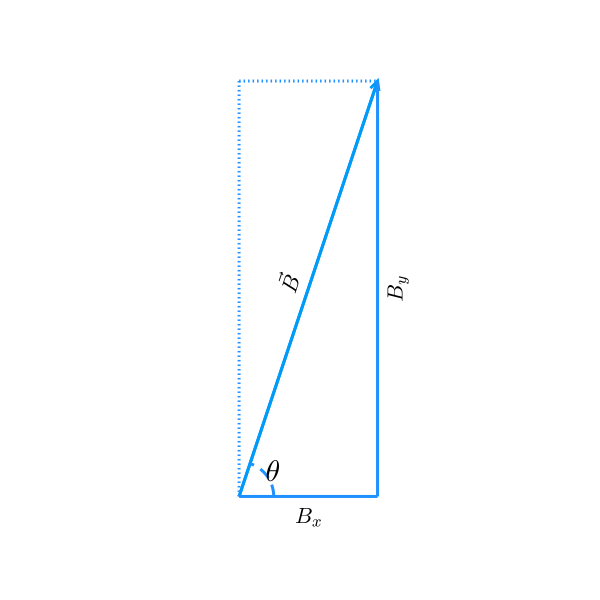

In [8]:
ann_cat = [(B[1]/2, -0.05*B[2], text(latexstring("B_x"), halign = :center, valign = :center, pointsize = 15)),
    (B[1] + 0.05*B[2], B[2]/2, text(latexstring("B_y"), halign = :center, valign = :center, 
            rotation = 90, pointsize = 15))]

quiver([0],[0], quiver = ([B[1]],[B[2]]), size = (600,600), framestyle = :none, xlimit = (-1,B[1]+1),
    ylimit = (-1,B[2] + 1))
#plot!([0,10],[0,0], ls = :dot, color = :black, lw = 2)
#plot!([0,0],[0,10], ls = :dot, color = :black, lw = 2)
#desenhando catetos
plot!([0,B[1]],[0,0], color = :dodgerblue, lw = 3)
plot!([0,B[1]],[B[2],B[2]], color = :dodgerblue, lw = 3, ls = :dot, ann = ann_cat)

plot!([0,0],[0,B[2]], color = :dodgerblue, lw = 3, ls = :dot)
plot!([B[1],B[1]],[0,B[2]], color = :dodgerblue, lw = 3)
plot!(x_ang, y_ang, color = :dodgerblue, ls = :dash, ann = ann_vec)

Podemos ver que a componente $B_x$ é o cateto adjacente ao ângulo $\theta$, enquanto a componente $B_y$ é o cateto oposto a $\theta$. Lembrando das relações trigonométricas:

$$ {\rm sen }\,\theta = \frac{co}{h} = \frac{B_y}{||\vec{B}||},$$

$$ \cos \theta = \frac{ca}{h} = \frac{B_x}{||\vec{B}||}.$$

Como sabemos o valor de $\theta$, podemos calcular o valor de ${\rm sen}\, \theta$ e $\cos \theta$. Também sabemos o valor de $||\vec{B}||$. Podemos utilizar as relações acima para calcular as componentes $B_x$ e $B_y$:

$$ B_x = ||\vec{B}||\cdot \cos \theta,$$

$$ B_y = ||\vec{B}||\cdot {\rm sen}\,\theta.$$

In [9]:
cos_theta = @sprintf("%1.2f", cosd(ang_B))
cos_theta = replace(cos_theta, "." => ",\\!")
sen_theta = @sprintf("%1.2f", sind(ang_B))
sen_theta = replace(sen_theta, "." => ",\\!")

latexstring("\\theta = ", ang_B_str, "^{\\circ} \\newline \\cos \\theta = ", cos_theta, 
    "\\newline {\\rm sen}\\, \\theta = ", sen_theta)

L"$\theta = 71.57^{\circ} \newline \cos \theta = 0,\!32\newline {\rm sen}\, \theta = 0,\!95$"

In [10]:
mod_B_str = replace(mod_B_str, "." => ",\\!")
B_x_str = @sprintf("%2.2f", mod_B * cosd(ang_B))
B_x_str = replace(B_x_str, "." => ",\\!")
B_y_str = @sprintf("%2.2f", mod_B * sind(ang_B))
B_y_str = replace(B_y_str, "." => ",\\!")

latexstring("||\\vec{B}|| = ", mod_B_str, "\\newline B_x = ", mod_B_str, "\\cdot", cos_theta, " = ", 
    B_x_str, "\\newline B_y = ", mod_B_str, "\\cdot", sen_theta, " = ", B_y_str)

L"$||\vec{B}|| = 6,\!32\newline B_x = 6,\!32\cdot0,\!32 = 2,\!00\newline B_y = 6,\!32\cdot0,\!95 = 6,\!00$"

Ou seja, podemos representar $\vec{B}$ como:

In [11]:
latexstring("\\vec{B} = [", B[1], ",", B[2], "]")

L"$\vec{B} = [2,6]$"

E graficamente:

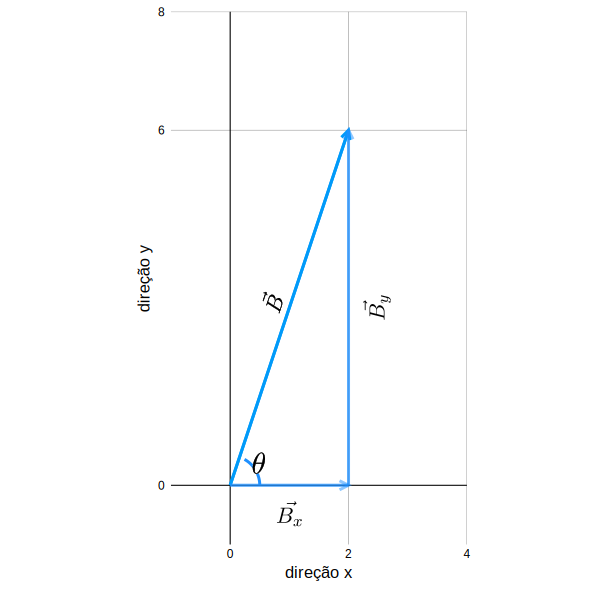

In [12]:
ann_cat = [(B[1]/2, -0.08*B[2], text(latexstring("\\vec{B_x}"), halign = :center, valign = :center, pointsize = 15)),
    (B[1] + 0.08*B[2], B[2]/2, text(latexstring("\\vec{B_y}"), halign = :center, valign = :center, 
            rotation = 90, pointsize = 15))]

quiver([0],[0], quiver = ([B[1]],[B[2]]), size = (600,600), framestyle = :zerolines,
    xaxis = ("direção x", (-1,B[1]+2), [0,B[1], B[1]+2]),
    yaxis = ("direção y", (-1,B[2]+2), [0,B[2], B[2]+2]), gridalpha = 0.5, ann = ann_vec)
quiver!([0,B[1]],[0,0], quiver = ([B[1],0],[0,B[2]]), color = :dodgerblue, alpha = 0.5, ann = ann_cat)
plot!(x_ang, y_ang, color = :dodgerblue, ls = :dash, ann = ann_vec)


Ou seja:

$$\vec{B} = \vec{B_x} + \vec{B_y} = [B_x, B_y].$$

Não é necessário decompor os vetores apenas nas direções horizontais e verticais, podemos escolher direções arbitrárias que simplifiquem a análise do problema, mas as direções escolhidas devem ser sempre perpendiculares entre si.

Para simplificar nossa notação, utilizaremos a identificação do vetor sem o símbolo da seta para representar seu módulo:

$$ B = ||\vec{B}||,$$

ou seja, enquanto $\vec{B}$ representa o vetor com seu módulo, direção e sentido, $B$ representa o módulo de $\vec{B}$.